In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [235]:
df=pd.read_csv('transaction_dataset.csv')

# EDA

In [236]:
df.shape

(9841, 51)

In [237]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


0    7662
1    2179
Name: FLAG, dtype: int64


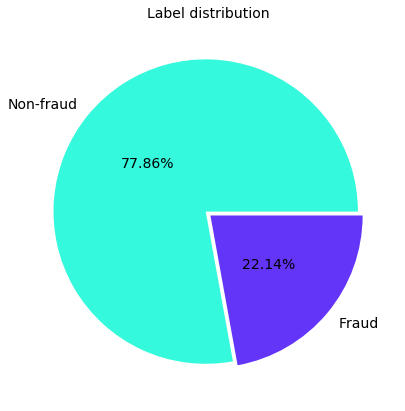

In [238]:
# Inspect target distribution
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[10,7])
labels = ['Non-fraud', 'Fraud']
colors = ['#35f9dc', '#6335f9']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Label distribution',fontsize=14)
plt.show()

In [239]:
# Check Missing Values and Unique Values
pd.concat([df.isna().sum(),df.nunique()],axis=1).rename(columns = {0:'Nulls',1:'Uniques'})

,Nulls,Uniques
Unnamed: 0,0,9841
Index,0,4729
Address,0,9816
FLAG,0,2
Avg min between sent tnx,0,5013
Avg min between received tnx,0,6223
Time Diff between first and last (Mins),0,7810
Sent tnx,0,641
Received Tnx,0,727
Number of Created Contracts,0,20


In [240]:
# Dropping the columns with only one unique value which means they are meaningless.
df.drop([' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx'
       , ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract'
       , ' ERC20 avg val sent contract'], axis = 1, inplace = True)

# Dropping the index columns
df.drop(['Unnamed: 0', 'Index'], axis = 1, inplace = True)

# Dropping the columns without explaination 
df.drop(' ERC20 uniq sent addr.1', axis = 1, inplace = True) 

# Dropping duplicated rows
df.drop_duplicates(inplace = True)

# Dropping Address because it's similar to index
df.drop('Address', axis = 1, inplace = True) 

In [241]:
# Rename Columns 
df.rename(columns={'FLAG': 'is_fraud',
                   'Avg min between sent tnx': 'avg_time_between_sends',
                   'Avg min between received tnx': 'avg_time_between_recvs',
                   'Time Diff between first and last (Mins)': 'time_since_first_transaction',
                   'Sent tnx': 'sent_transactions',
                   'Received Tnx': 'recv_transactions',
                   'Number of Created Contracts': 'num_created_contracts',
                   'Unique Received From Addresses': 'total_addr_recv',
                   'Unique Sent To Addresses': 'total_addr_sent',
                   'min value received': 'min_val_recv',
                   'max value received ': 'max_val_recv',
                   'avg val received': 'avg_val_recv',
                   'min val sent': 'min_val_sent',
                   'max val sent': 'max_val_sent',
                   'avg val sent': 'avg_val_sent',
                   'min value sent to contract': 'min_val_sent_contracts',
                   'max val sent to contract': 'max_val_sent_contracts',
                   'avg value sent to contract': 'avg_val_sent_contracts',
                   'total transactions (including tnx to create contract': 'total_transactions',
                   'total Ether sent': 'total_ether_sent',
                   'total ether received': 'total_ether_recv',
                   'total ether sent contracts': 'total_ether_sent_contracts',
                   'total ether balance': 'total_ether_balance',
                   ' Total ERC20 tnxs': 'erc_total_transactions',
                   ' ERC20 total Ether received': 'erc_ether_recv',
                   ' ERC20 total ether sent': 'erc_ether_sent',
                   ' ERC20 total Ether sent contract': 'erc_ether_sent_contract',
                   ' ERC20 uniq sent addr': 'erc_total_addr_sent',
                   ' ERC20 uniq rec addr': 'erc_total_addr_recv',
                   ' ERC20 uniq rec contract addr': 'erc_total_addr_sent_contract',
                   ' ERC20 min val rec': 'erc_min_val_recv',
                   ' ERC20 max val rec': 'erc_max_val_recv',
                   ' ERC20 avg val rec': 'erc_avg_val_recv',
                   ' ERC20 min val sent': 'erc_min_val_sent',
                   ' ERC20 max val sent': 'erc_max_val_sent',
                   ' ERC20 avg val sent': 'erc_avg_val_sent',
                   ' ERC20 uniq sent token name': 'erc_unique_tokens_sent',
                   ' ERC20 uniq rec token name': 'erc_unique_tokens_recv',
                   ' ERC20 most sent token type': 'erc_most_sent_token',
                   ' ERC20_most_rec_token_type': 'erc_most_recv_token'}, inplace = True)

In [242]:
df.shape

(9823, 40)

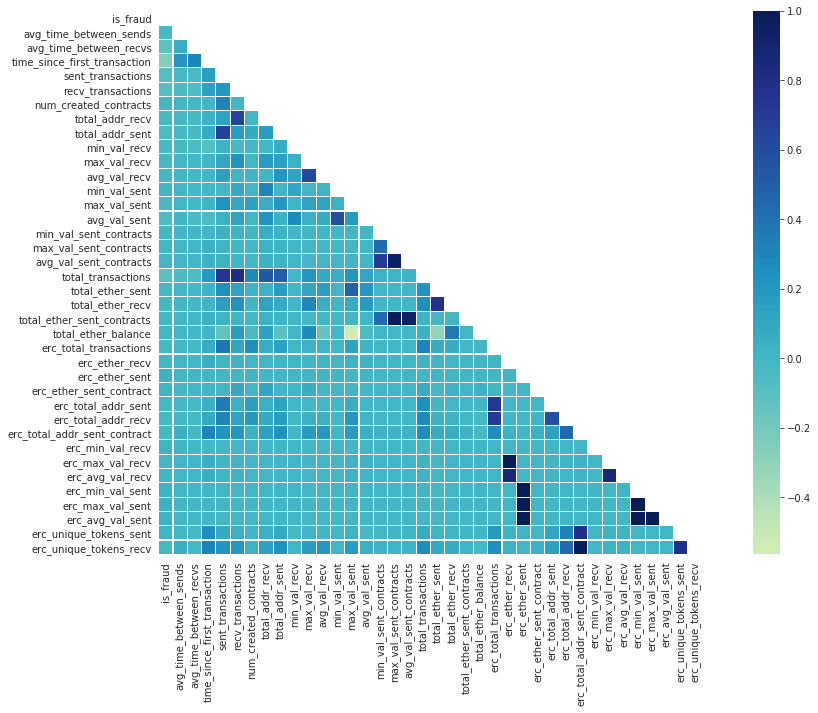

In [243]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap="YlGnBu", center=0, linewidths=0.1, square=True)

In [244]:
corr_df

,col_labels,corr_values
21,total_ether_balance,0.003236
11,min_val_sent,0.006603
14,min_val_sent_contracts,0.007228
15,max_val_sent_contracts,0.008004
20,total_ether_sent_contracts,0.008005
16,avg_val_sent_contracts,0.008901
10,avg_val_recv,0.011871
5,num_created_contracts,0.013741
18,total_ether_sent,0.015022
19,total_ether_recv,0.016934


Text(0.5, 1.0, 'Correlation coefficient of the variables')

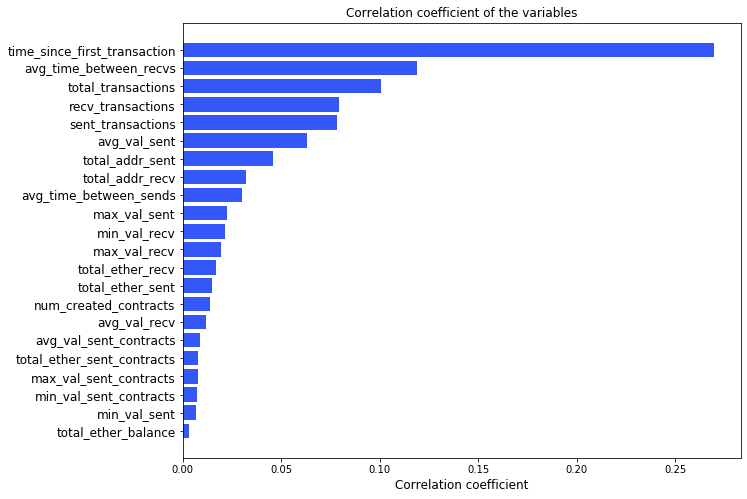

In [245]:
x_cols = [col for col in df.columns if col not in ['is_fraud'] if df[col].dtype!='object']
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.is_fraud,values)[0, 1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df= corr_df.dropna(how='any',axis=0)
corr_df.corr_values=corr_df.corr_values.apply(lambda x: abs(x))
corr_df = corr_df.sort_values(by = 'corr_values')
ind = corr_df.col_labels
width = 0.5
fig,ax = plt.subplots(figsize = (10,8))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='#3556f9')
 
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal',fontsize=12)
ax.set_xlabel('Correlation coefficient',fontsize=12)
ax.set_title('Correlation coefficient of the variables',fontsize=12)

# Feature Engineering

In [246]:
# Dropping the columns with high correlation to other independent variables.
df.drop(['erc_ether_sent','erc_ether_recv','max_val_sent_contracts','erc_min_val_sent',
         'erc_max_val_sent','erc_total_addr_sent_contract','avg_val_sent_contracts'
        ,'erc_total_transactions','erc_max_val_recv','total_transactions','total_ether_sent',
        'sent_transactions','recv_transactions','erc_most_recv_token','max_val_recv'
         ,'min_val_sent','erc_unique_tokens_sent','erc_total_addr_recv'], axis = 1, inplace = True)

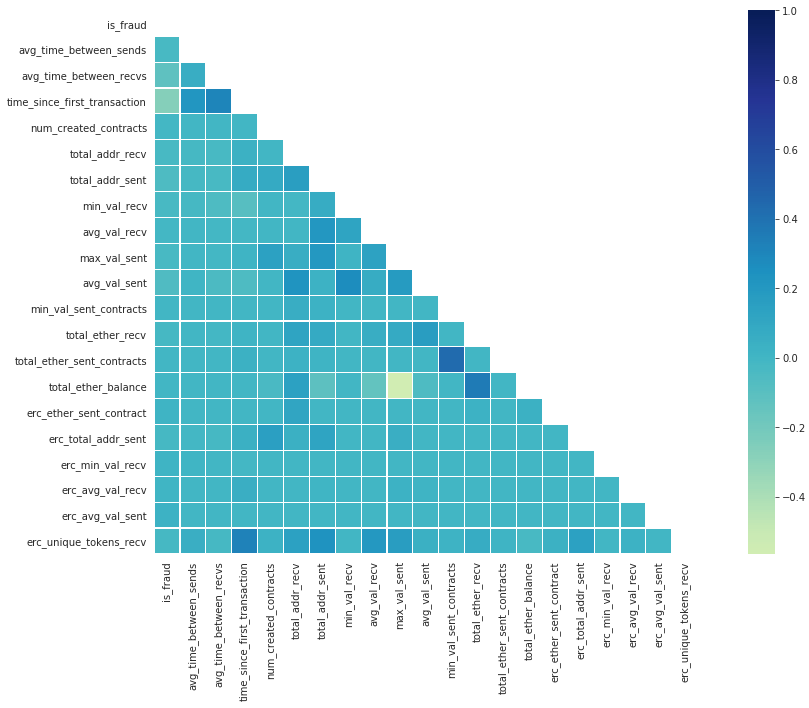

In [247]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap="YlGnBu", center=0, linewidths=0.1, square=True)

In [248]:
df.shape

(9823, 22)

In [249]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min_val_sent_contracts has the following distribution: 
0.00    9821
0.02       1
0.01       1
Name: min_val_sent_contracts, dtype: int64
The column total_ether_sent_contracts has the following distribution: 
0.000000    9820
0.020000       1
0.010000       1
0.046029       1
Name: total_ether_sent_contracts, dtype: int64


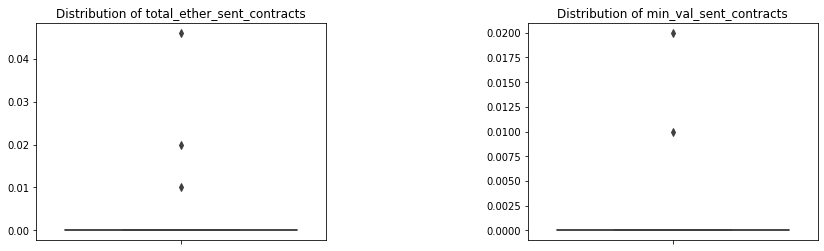

In [250]:
columns = df.columns
fig, axes = plt.subplots(1, 2, figsize=(14, 4), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
ax = sns.boxplot(ax = axes[0], y=df.total_ether_sent_contracts.values)
ax.set_title(f'Distribution of total_ether_sent_contracts')

ax1 = sns.boxplot(ax = axes[1], y=df.min_val_sent_contracts.values)
ax1.set_title(f'Distribution of min_val_sent_contracts')
plt.show()

In [251]:
df.drop(['total_ether_sent_contracts','min_val_sent_contracts'], axis = 1, inplace = True)

### Tree Model Feature Importance

In [252]:
import lightgbm as lgb
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, plot_confusion_matrix, accuracy_score

#### Data Processing

In [253]:
df.dtypes

is_fraud                          int64
avg_time_between_sends          float64
avg_time_between_recvs          float64
time_since_first_transaction    float64
num_created_contracts             int64
total_addr_recv                   int64
total_addr_sent                   int64
min_val_recv                    float64
avg_val_recv                    float64
max_val_sent                    float64
avg_val_sent                    float64
total_ether_recv                float64
total_ether_balance             float64
erc_ether_sent_contract         float64
erc_total_addr_sent             float64
erc_min_val_recv                float64
erc_avg_val_recv                float64
erc_avg_val_sent                float64
erc_unique_tokens_recv          float64
erc_most_sent_token              object
dtype: object

In [254]:
df.erc_most_sent_token.nunique()

305

In [255]:
pd.concat([df.isna().sum(),df.nunique()],axis=1).rename(columns = {0:'Nulls',1:'Uniques'})

,Nulls,Uniques
is_fraud,0,2
avg_time_between_sends,0,5013
avg_time_between_recvs,0,6223
time_since_first_transaction,0,7810
num_created_contracts,0,20
total_addr_recv,0,256
total_addr_sent,0,258
min_val_recv,0,4589
avg_val_recv,0,6767
max_val_sent,0,6647


In [267]:
df.drop(['erc_most_sent_token'], axis = 1, inplace = True)

In [289]:
preprocessing_pipeline = Pipeline([
    ('impoter', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

X = df.drop(columns='is_fraud').to_numpy()
y = df['is_fraud']


### Resampling

In [290]:
X= preprocessing_pipeline.fit_transform(X)
smt = SMOTEENN(random_state=1)
X_smt, y_smt = smt.fit_resample(X, y)

In [291]:
pd.concat([df['is_fraud'].value_counts().rename('original'), y_smt.value_counts().rename('smoteenn')], axis=1)

,original,smoteenn
0,7644,6807
1,2179,7194


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, train_size=0.8)

### Modeling

In [293]:
model = RandomForestClassifier(max_features='sqrt', min_samples_leaf=1, min_samples_split=2,
                                     bootstrap=False, n_estimators = 500)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

f1 score = 0.9947570779447745
ROC AUC score = 0.9946348691425279
accuracy score = 0.9946447697250982


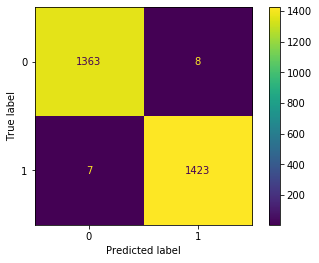

In [294]:
print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions)))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(model, X_test, y_test))

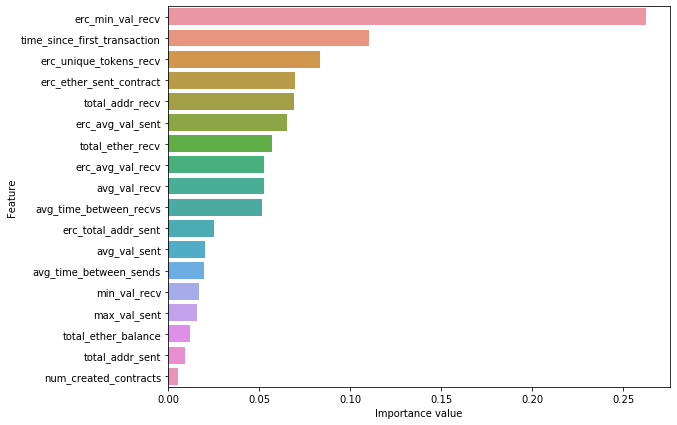

In [283]:
def plot_features_importance(feature_importance):
    column_names = df.drop(columns='is_fraud').columns

    df_feature_importance = pd.DataFrame(sorted(zip(feature_importance, column_names)),
                                       columns=['Importance value', 'Feature'])
    df_feature_importance = df_feature_importance.sort_values('Importance value', ascending=False)

    plt.figure(figsize=(9, 7)).tight_layout()
    sns.barplot(y="Feature", x="Importance value", data=df_feature_importance)
    plt.show()

plot_features_importance(model.feature_importances_)